In [2]:
!pip install torch torchvision


Step [0/300], Loss: 0.5251889228820801
Step [50/300], Loss: 0.2221749722957611
Step [100/300], Loss: 0.18434777855873108
Step [150/300], Loss: 0.17207691073417664
Step [200/300], Loss: 0.16592098772525787
Step [250/300], Loss: 0.16238033771514893


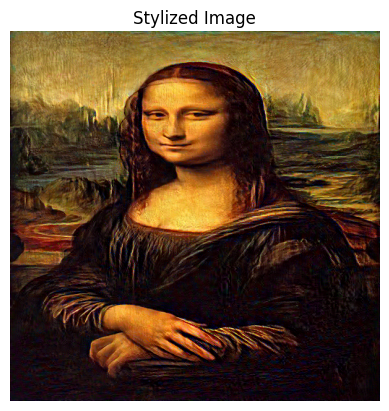

In [9]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the pre-trained VGG model for feature extraction
class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        self.vgg = models.vgg19(pretrained=True).features[:36]  # Increase the number of layers

    def forward(self, x):
        features = []
        for layer in self.vgg:
            x = layer(x)
            features.append(x)
        return features

# Define the Gram matrix calculation
def gram_matrix(input):
    batch_size, channel, height, width = input.size()
    features = input.view(batch_size * channel, height * width)
    G = torch.mm(features, features.t())
    return G.div(batch_size * channel * height * width)

# Define the style transfer model
class StyleTransferModel(nn.Module):
    def __init__(self, content_layers, style_layers):
        super(StyleTransferModel, self).__init__()
        self.vgg = VGG()
        self.content_layers = content_layers
        self.style_layers = style_layers
        self.mean = torch.tensor([0.485, 0.456, 0.406]).view(-1, 1, 1)
        self.std = torch.tensor([0.229, 0.224, 0.225]).view(-1, 1, 1)

    def forward(self, content_img, style_img, input_img, alpha=1, beta=1e5):
        content_losses = []
        style_losses = []
        content_features = self.vgg(content_img)
        style_features = self.vgg(style_img)
        input_features = self.vgg(input_img)

        for content_layer in self.content_layers:
            content_losses.append(nn.MSELoss()(input_features[content_layer], content_features[content_layer]))

        for style_layer in self.style_layers:
            gram_style = gram_matrix(style_features[style_layer])
            gram_input = gram_matrix(input_features[style_layer])
            style_losses.append(nn.MSELoss()(gram_input, gram_style))

        total_loss = alpha * sum(content_losses) + beta * sum(style_losses)
        return total_loss

# Load content and style images
def load_image(image_path, size=None):
    image = Image.open(image_path)
    if size is not None:
        image = image.resize((size, size))
    return transforms.ToTensor()(image).unsqueeze(0)

# Display image
def imshow(tensor, title=None):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = transforms.ToPILImage()(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.axis('off')
    plt.show()

# Main function for style transfer
def style_transfer(content_img_path, style_img_path, num_steps=300, alpha=1, beta=1e5):
    content_img = load_image(content_img_path, size=512)
    style_img = load_image(style_img_path, size=512)
    input_img = content_img.clone().requires_grad_(True)

    content_layers = [21]  # Choose VGG layers for content representation
    style_layers = [0, 5, 10, 19, 28]  # Choose VGG layers for style representation

    model = StyleTransferModel(content_layers, style_layers).cuda()
    optimizer = torch.optim.Adam([input_img.requires_grad_()], lr=0.01)

    for step in range(num_steps):
        optimizer.zero_grad()
        total_loss = model(content_img.cuda(), style_img.cuda(), input_img.cuda(), alpha, beta)
        total_loss.backward()
        optimizer.step()

        if step % 50 == 0:
            print(f'Step [{step}/{num_steps}], Loss: {total_loss.item()}')

    input_img.data.clamp_(0, 1)
    return input_img

# Perform style transfer
content_img_path = 'content1.jpg'  # Path to content image
style_img_path = 'style.jpg'      # Path to style image
output_img = style_transfer(content_img_path, style_img_path)

# Display results

imshow(output_img, title='Stylized Image')


Step [0/300], Loss: 0.6411855816841125
Step [50/300], Loss: 0.31207144260406494
Step [100/300], Loss: 0.2681126892566681
Step [150/300], Loss: 0.2533007264137268
Step [200/300], Loss: 0.24646976590156555
Step [250/300], Loss: 0.24085426330566406


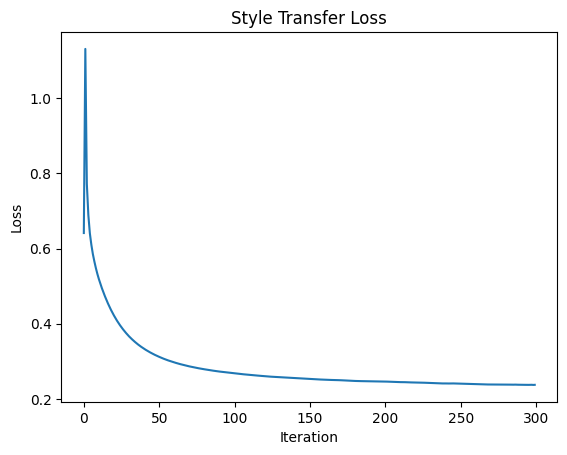

In [10]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the pre-trained VGG model for feature extraction
class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        self.vgg = models.vgg19(pretrained=True).features[:36]  # Increase the number of layers

    def forward(self, x):
        features = []
        for layer in self.vgg:
            x = layer(x)
            features.append(x)
        return features

# Define the Gram matrix calculation
def gram_matrix(input):
    batch_size, channel, height, width = input.size()
    features = input.view(batch_size * channel, height * width)
    G = torch.mm(features, features.t())
    return G.div(batch_size * channel * height * width)

# Define the style transfer model
class StyleTransferModel(nn.Module):
    def __init__(self, content_layers, style_layers):
        super(StyleTransferModel, self).__init__()
        self.vgg = VGG()
        self.content_layers = content_layers
        self.style_layers = style_layers
        self.mean = torch.tensor([0.485, 0.456, 0.406]).view(-1, 1, 1)
        self.std = torch.tensor([0.229, 0.224, 0.225]).view(-1, 1, 1)

    def forward(self, content_img, style_img, input_img, alpha=1, beta=1e5):
        content_losses = []
        style_losses = []
        content_features = self.vgg(content_img)
        style_features = self.vgg(style_img)
        input_features = self.vgg(input_img)

        for content_layer in self.content_layers:
            content_losses.append(nn.MSELoss()(input_features[content_layer], content_features[content_layer]))

        for style_layer in self.style_layers:
            gram_style = gram_matrix(style_features[style_layer])
            gram_input = gram_matrix(input_features[style_layer])
            style_losses.append(nn.MSELoss()(gram_input, gram_style))

        total_loss = alpha * sum(content_losses) + beta * sum(style_losses)
        return total_loss

# Load content and style images
def load_image(image_path, size=None):
    image = Image.open(image_path)
    if size is not None:
        image = image.resize((size, size))
    return transforms.ToTensor()(image).unsqueeze(0)

# Main function for style transfer
def style_transfer(content_img_path, style_img_path, num_steps=300, alpha=1, beta=1e5):
    content_img = load_image(content_img_path, size=512)
    style_img = load_image(style_img_path, size=512)
    input_img = content_img.clone().requires_grad_(True)

    content_layers = [21]  # Choose VGG layers for content representation
    style_layers = [0, 5, 10, 19, 28]  # Choose VGG layers for style representation

    model = StyleTransferModel(content_layers, style_layers).cuda()
    optimizer = torch.optim.Adam([input_img.requires_grad_()], lr=0.01)

    losses = []  # Track losses

    for step in range(num_steps):
        optimizer.zero_grad()
        total_loss = model(content_img.cuda(), style_img.cuda(), input_img.cuda(), alpha, beta)
        total_loss.backward()
        optimizer.step()

        losses.append(total_loss.item())  # Store loss

        if step % 50 == 0:
            print(f'Step [{step}/{num_steps}], Loss: {total_loss.item()}')

    input_img.data.clamp_(0, 1)
    return input_img, losses

# Perform style transfer
content_img_path = 'content.jpg'  # Path to content image
style_img_path = 'style.jpg'      # Path to style image
output_img, losses = style_transfer(content_img_path, style_img_path)

# Plot loss
plt.plot(losses)
plt.title('Style Transfer Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()
